In [1]:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install fastapi
  !pip install python-multipart>=0.0.5
  !pip install pyngrok uvicorn

  !pip3 install opencv-contrib-python
  
  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models


Looking in links: https://download.pytorch.org/whl/torch/, https://download.pytorch.org/whl/torchvision/
fatal: destination path 'CLIP' already exists and is not an empty directory.
fatal: destination path 'taming-transformers' already exists and is not an empty directory.
Cloning into 'clipit'...
remote: Enumerating objects: 749, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 749 (delta 278), reused 261 (delta 261), pack-reused 463
Receiving objects: 100% (749/749), 58.10 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (432/432), done.
  Cloning https://github.com/pvigier/perlin-numpy to /tmp/pip-req-build-8q1hcr50
  Running command git clone -q https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-8q1hcr50
fatal: destination path 'diffvg' already exists and is not an empty directory.
/content/diffvg
running install
/usr/local/lib/python3.7/dist-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWa

In [1]:
import sys
import IPython
import os


sys.path.append("clipit")
result_msg = "setup complete"
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !wget https://github.com/Saafke/FSRCNN_Tensorflow/raw/master/models/FSRCNN_x3.pb
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"


Public URL: http://22c8-35-229-234-155.ngrok.io
Doc URL: http://22c8-35-229-234-155.ngrok.io/docs


INFO:     Started server process [3410]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Happy Birthday Pratik
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Happy Birthday Pratik low poly']
Using seed: 8399774626984837153


0it [00:00, ?it/s]

iter: 0, loss: 0.938971, losses: 0.938971


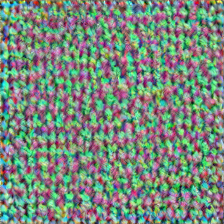

iter: 10, loss: 0.881568, losses: 0.881568
iter: 20, loss: 0.849508, losses: 0.849508


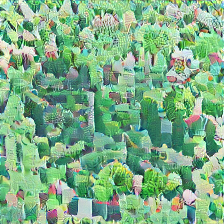

iter: 30, loss: 0.820402, losses: 0.820402
iter: 40, loss: 0.813251, losses: 0.813251


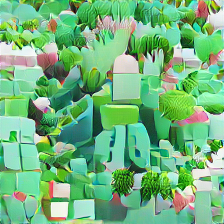

iter: 50, loss: 0.801203, losses: 0.801203
iter: 60, loss: 0.783747, losses: 0.783747


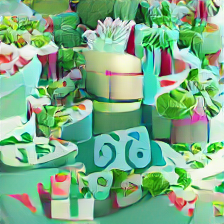

iter: 70, loss: 0.775438, losses: 0.775438
iter: 80, loss: 0.743774, losses: 0.743774


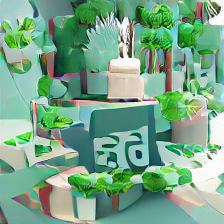

iter: 90, loss: 0.725303, losses: 0.725303
iter: 100, loss: 0.701128, losses: 0.701128


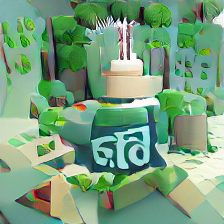

iter: 110, loss: 0.732546, losses: 0.732546
iter: 120, loss: 0.728299, losses: 0.728299


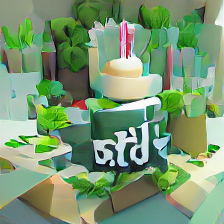

INFO:     223.190.87.55:0 - "POST /generate HTTP/1.1" 200 OK
Potato pops
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Potato pops low poly']
Using seed: 9241268920202798441


0it [00:00, ?it/s]

iter: 0, loss: 0.919978, losses: 0.919978


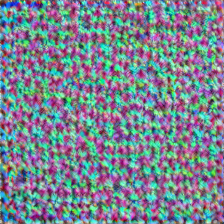

iter: 10, loss: 0.844166, losses: 0.844166
iter: 20, loss: 0.806539, losses: 0.806539


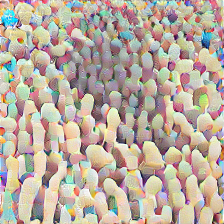

iter: 30, loss: 0.788016, losses: 0.788016
iter: 40, loss: 0.761585, losses: 0.761585


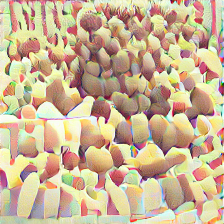

iter: 50, loss: 0.732672, losses: 0.732672
iter: 60, loss: 0.719109, losses: 0.719109


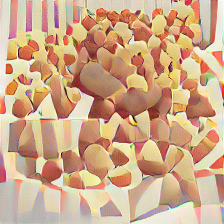

iter: 70, loss: 0.720679, losses: 0.720679
iter: 80, loss: 0.716818, losses: 0.716818


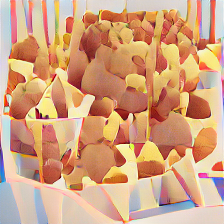

iter: 90, loss: 0.718215, losses: 0.718215
iter: 100, loss: 0.697652, losses: 0.697652


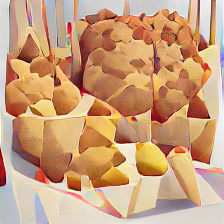

iter: 110, loss: 0.690546, losses: 0.690546
iter: 120, loss: 0.662087, losses: 0.662087


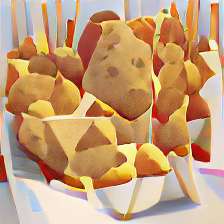

INFO:     223.190.87.55:0 - "POST /generate HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [3410]


In [4]:
import clipit
import torch
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from fastapi import FastAPI, File, UploadFile, Form, BackgroundTasks
from fastapi.responses import FileResponse
from pydantic import BaseModel
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import cv2

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

@app.get('/')
async def root():
    return {'hello': 'world'}

class GenerateReqBody(BaseModel):
  prompts: str = "Underwater World"

@app.post("/generate")
async def generate(
        reqBody: GenerateReqBody
    ):
    print(reqBody.prompts)
    torch.cuda.empty_cache()
    clipit.reset_settings()
    reqBody.prompts = reqBody.prompts + " low poly"

    clipit.add_settings(prompts=reqBody.prompts,
                        iterations=120,
                        aspect="square",
                        quality="draft",
                        scale=1.5,
                        use_pixeldraw=False,
                        use_clipdraw=False,
                        make_video=False)
    
    settings = clipit.apply_settings()
    clipit.do_init(settings)
    clipit.do_run(settings)

    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "FSRCNN_x3.pb"
    sr.readModel(path)
    sr.setModel("fsrcnn", 3) 
    img = cv2.imread('output.png')
    result = sr.upsample(img)
    cv2.imwrite('output_inc.png', result)

    return FileResponse('output_inc.png', media_type="image/png")
  

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print('Doc URL:', ngrok_tunnel.public_url+'/docs')
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [7]:
!pip3 install opencv-contrib-python

     |████████████████████████████████| 66.6 MB 124 kB/s 
